In [38]:
#=========================================================================
# load up the libraries
#=========================================================================
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering 
from sklearn.decomposition import PCA

#=========================================================================
# read in the data
#=========================================================================
df = pd.read_csv(r'../data/Wholesale_Data.csv',index_col=0)
print(df.columns)

print("number of rows on the dataset = " + str(len(df)))

Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')
number of rows on the dataset = 440


### `Part I`

##### ```Data Cleaning```

In [39]:
# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values
df.dropna(inplace=True)

# Check for duplicates
duplicate_rows = df[df.duplicated()]
df.drop_duplicates(inplace=True)

print("number of rows on the dataset after Data Cleaning = " + str(len(df)))

number of rows on the dataset after Data Cleaning = 440


##### `Data Visualization`

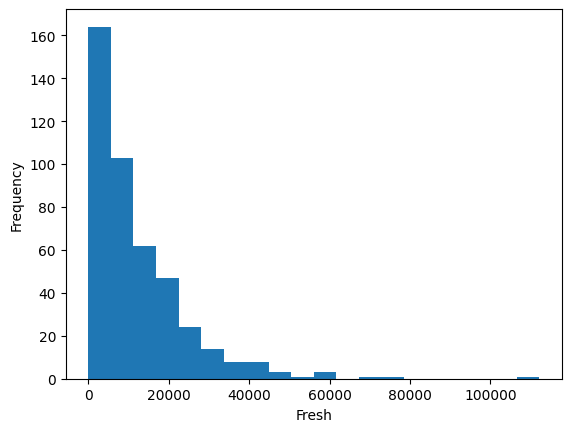

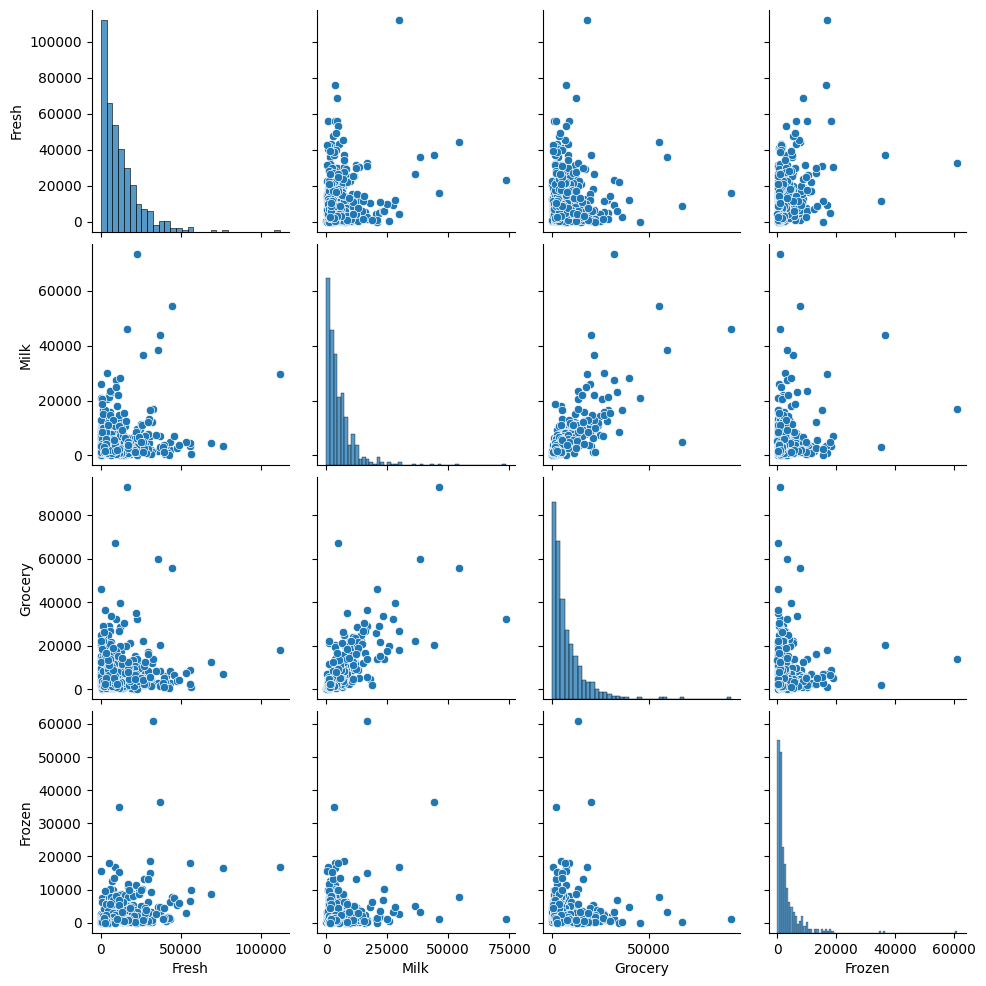

In [40]:
# Histogram of 'Fresh' column
plt.hist(df['Fresh'], bins=20)
plt.xlabel('Fresh')
plt.ylabel('Frequency')
plt.show()

# Pair plot for selected columns
sns.pairplot(df[['Fresh', 'Milk', 'Grocery', 'Frozen']])
plt.show()


##### `Outlier Detection and Data Visualization Before Cleaning`

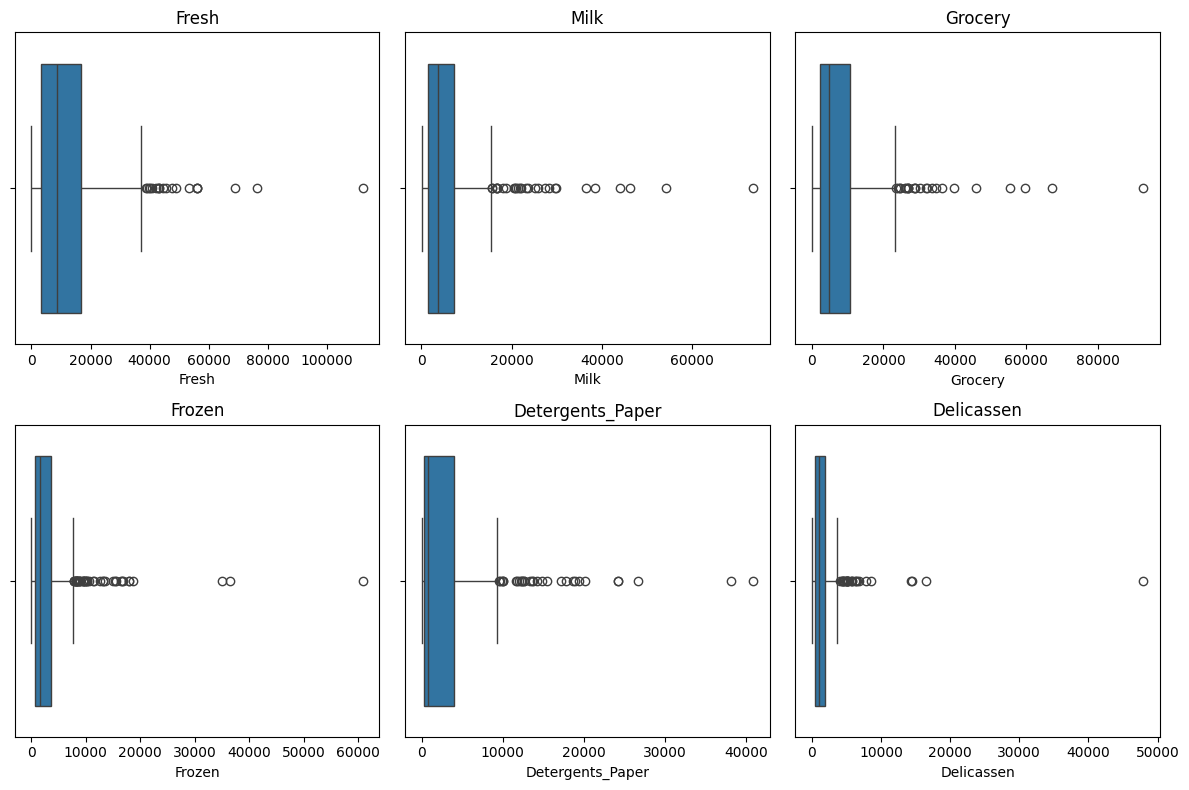

In [41]:
# Create a boxplot for each numerical column before cleaning outliers
plt.figure(figsize=(12, 8))
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### `Outlier Detection and Removal`

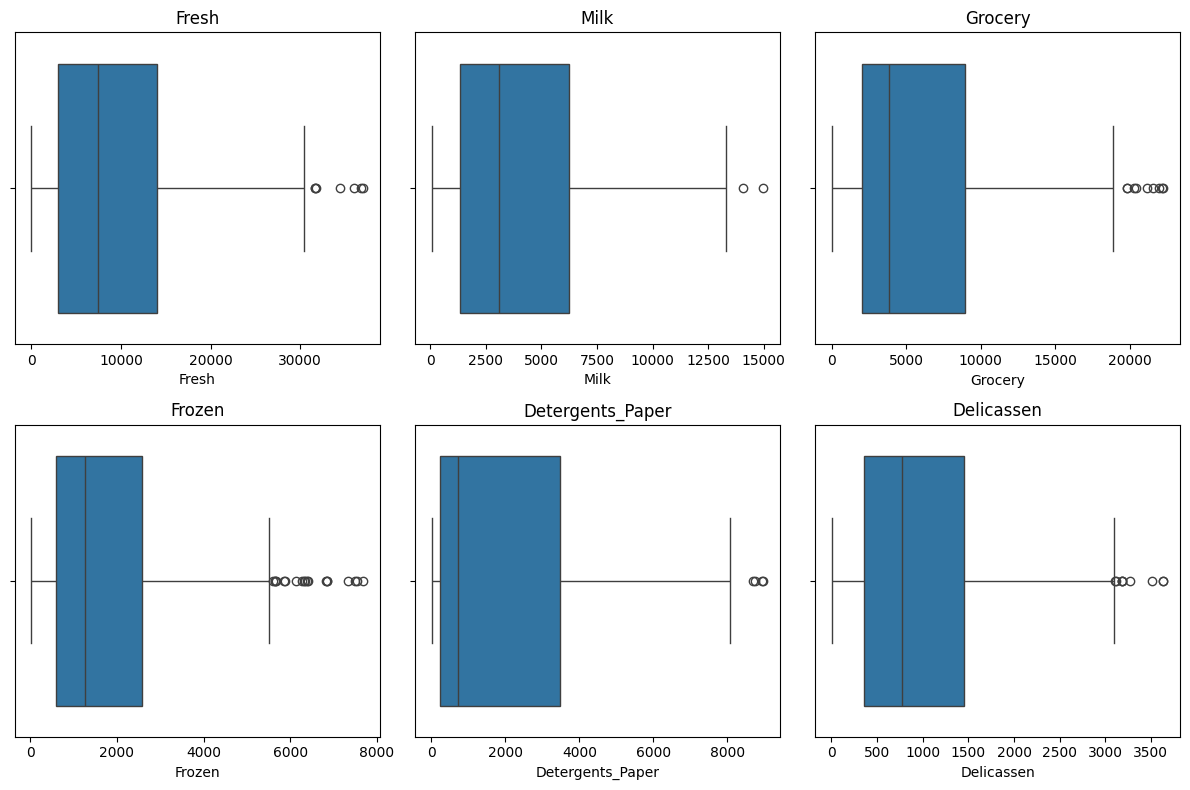

In [42]:
# Outlier detection and removal using IQR method for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualize boxplots after cleaning outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=outliers_removed[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### `Data Visualization After Cleaning`

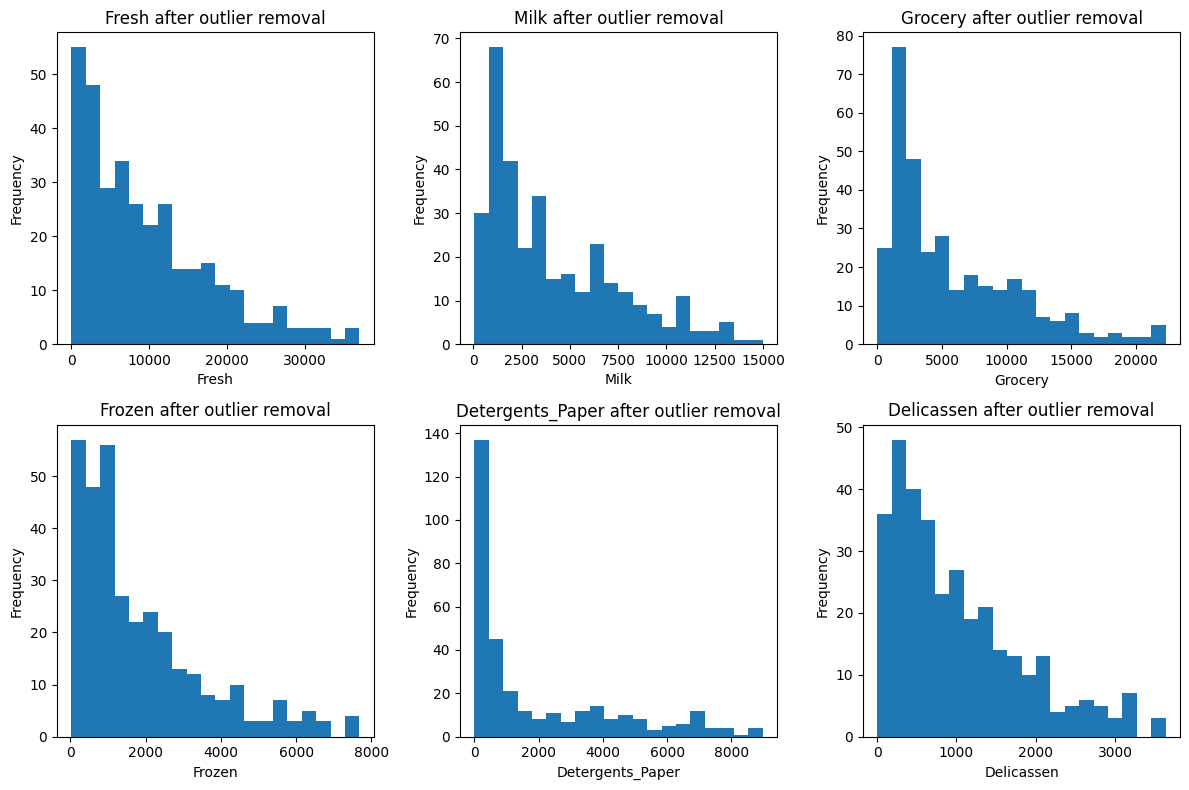

In [43]:
# Redo the data visualization after outlier removal
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(outliers_removed[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col} after outlier removal')
plt.tight_layout()
plt.show()

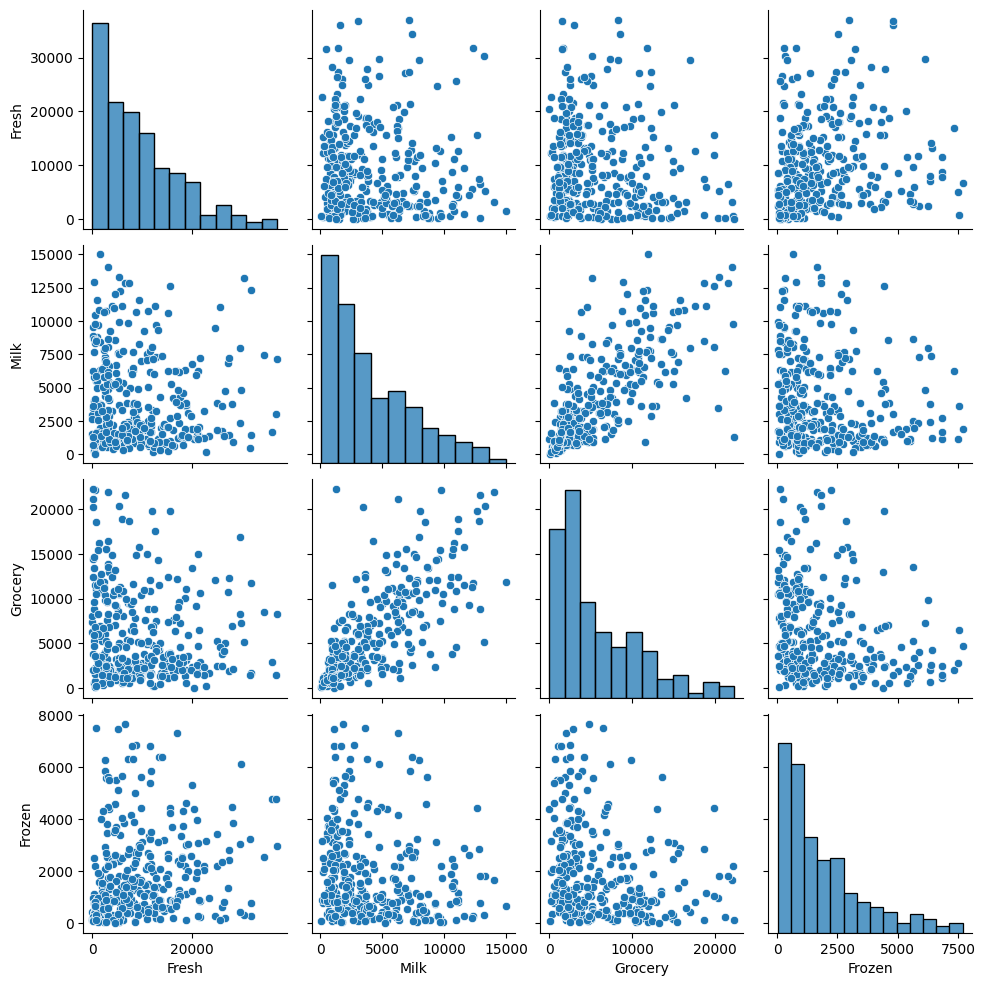

In [44]:
# Pair plot for selected columns
sns.pairplot(outliers_removed[['Fresh', 'Milk', 'Grocery', 'Frozen']])
plt.show()

In [45]:
df = outliers_removed
print("number of rows on the dataset after Data Cleaning = " + str(len(df)))

count_occurrences_region1 = df['Region'].eq(1).sum()
print("number of rows for Region 1 = " + str(count_occurrences_region1))
count_occurrences_region2 = df['Region'].eq(2).sum()
print("number of rows for Region 2 = " + str(count_occurrences_region2))
count_occurrences_region3 = df['Region'].eq(3).sum()
print("number of rows for Region 3 = " + str(count_occurrences_region3))

number of rows on the dataset after Data Cleaning = 332
number of rows for Region 1 = 60
number of rows for Region 2 = 33
number of rows for Region 3 = 239


##### `Correlation Analysis`

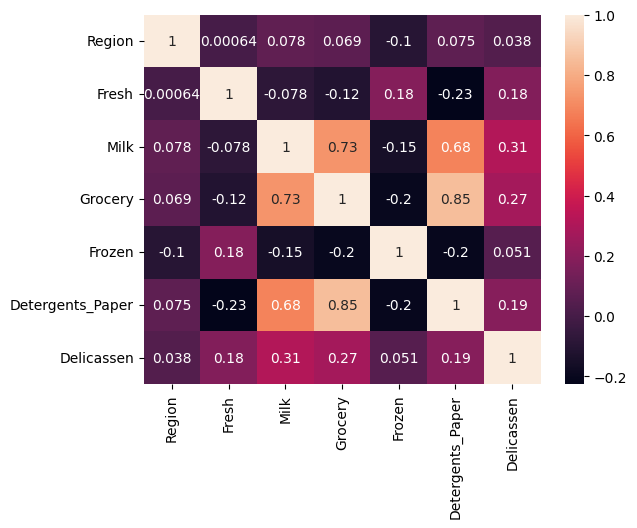

In [46]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

##### `Data Transformation`

In [47]:
# Example of standardizing the dataset using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Example of normalizing the dataset using MinMaxScaler
minmax_scaler = MinMaxScaler()
normalized_data = minmax_scaler.fit_transform(df)

##### `Feature Selection`

In [48]:
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
y = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper']]

# Train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Display feature importances
for feature_name, importance in zip(feature_names, importances):
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: Fresh, Importance: 0.6077892677401892
Feature: Milk, Importance: 0.051042243712917656
Feature: Grocery, Importance: 0.29450546280514556
Feature: Frozen, Importance: 0.022847733677361336
Feature: Detergents_Paper, Importance: 0.017958421059028132
Feature: Delicassen, Importance: 0.005856871005358108


### `Part II`

##### `KMeans Clustering analysis for Grocery and Detergent paper`

C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

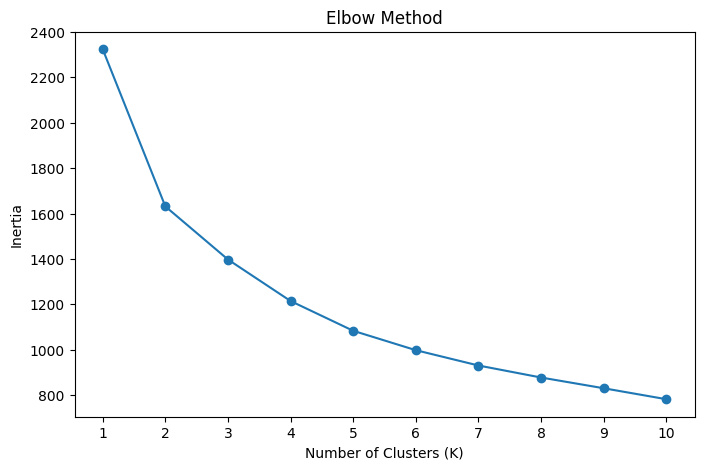

In [49]:
# Empty lists to store inertia (variance explained) and K values
inertia = []
k_values = range(1, 11)  # Trying different values of K from 1 to 10

# Fit KMeans for each K value and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data) # scaled_data is from Part I - Data Transformation
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_values)
plt.show()

C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

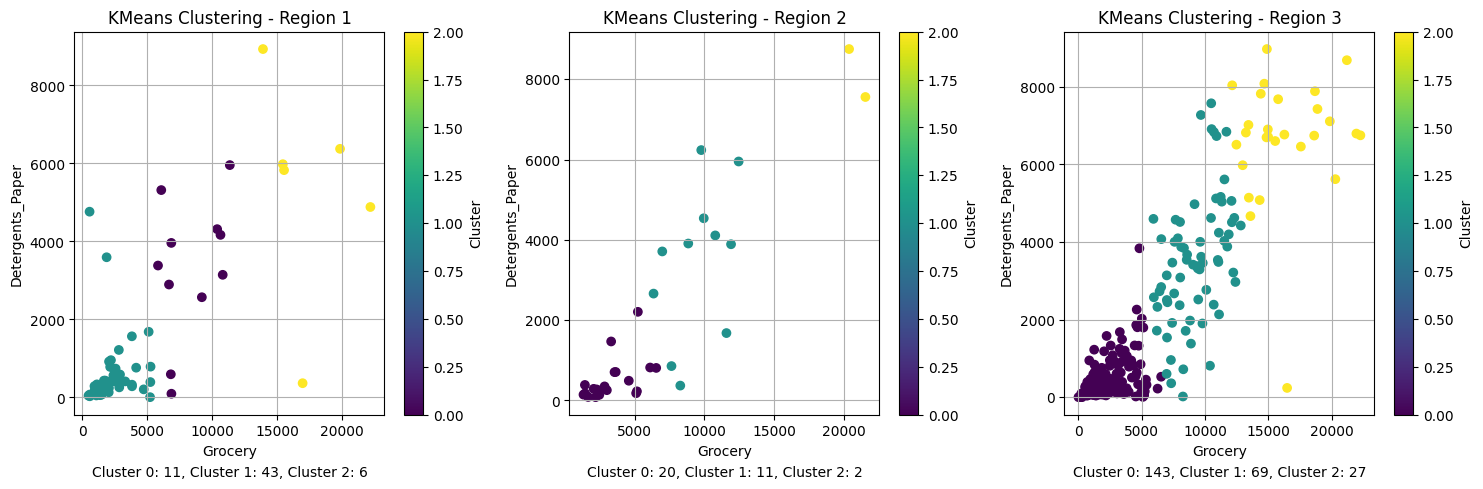

In [50]:
from sklearn.cluster import KMeans

# Subset the data for each region
region1_data = df[df['Region'] == 1][['Grocery','Detergents_Paper']]
region2_data = df[df['Region'] == 2][['Grocery','Detergents_Paper']]
region3_data = df[df['Region'] == 3][['Grocery','Detergents_Paper']]

fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 

for i, region_data in enumerate([region1_data, region2_data, region3_data]):
    kmeans = KMeans(n_clusters=3, random_state=42)  
    cluster_labels = kmeans.fit_predict(region_data)
    
    # Visualize clusters for each region
    scatter = axs[i].scatter(region_data.iloc[:, 0], region_data.iloc[:, 1], c=cluster_labels, cmap='viridis')
    axs[i].set_title(f'KMeans Clustering - Region {i+1}')
    axs[i].set_xlabel('Grocery')
    axs[i].set_ylabel('Detergents_Paper')
    axs[i].grid(True)
    
    cbar = plt.colorbar(scatter, ax=axs[i])
    cbar.set_label('Cluster')
    
    unique_clusters = sorted(set(cluster_labels))
    cluster_counts = [list(cluster_labels).count(c) for c in unique_clusters]
    subtitle_text = ', '.join([f'Cluster {c}: {count}' for c, count in zip(unique_clusters, cluster_counts)])
    axs[i].text(0.5, -0.15, subtitle_text, ha='center', va='center', transform=axs[i].transAxes, fontsize=10)
    
plt.tight_layout()
plt.show()

### `Part III`

##### `Hierarchical Clustering analysis for Grocery and Milk`

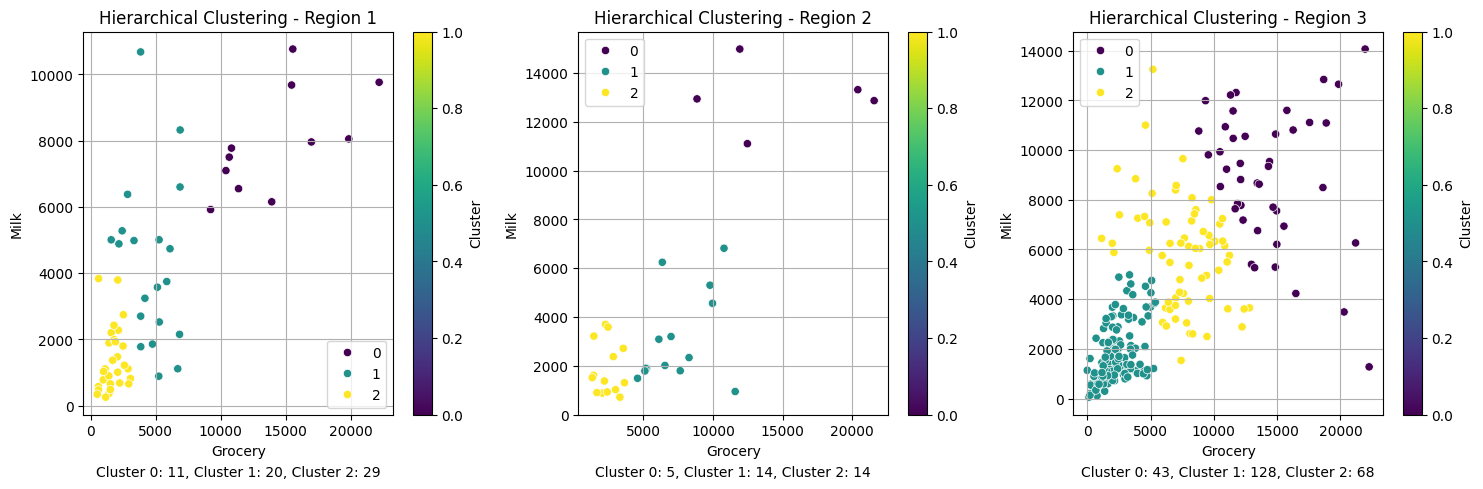

In [51]:

# Subset the data for each region
region1_data = df[df['Region'] == 1][['Grocery','Milk']]
region2_data = df[df['Region'] == 2][['Grocery','Milk']]
region3_data = df[df['Region'] == 3][['Grocery','Milk']]

# Selecting 'Grocery' and 'Milk' features
features = ['Grocery', 'Milk']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, region_data in enumerate([region1_data, region2_data, region3_data]):
    # Hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=3)
    cluster_labels = hierarchical.fit_predict(region_data[features])

    # Visualize clusters for each region
    scatter = sns.scatterplot(x=region_data['Grocery'], y=region_data['Milk'], hue=cluster_labels, palette='viridis', ax=axs[i])
    axs[i].set_title(f'Hierarchical Clustering - Region {i+1}')
    axs[i].set_xlabel('Grocery')
    axs[i].set_ylabel('Milk')
    axs[i].grid(True)
    
    cbar = plt.colorbar(scatter.get_children()[0], ax=axs[i]) 
    cbar.set_label('Cluster')
    
    unique_clusters = sorted(set(cluster_labels))
    cluster_counts = [list(cluster_labels).count(c) for c in unique_clusters]
    subtitle_text = ', '.join([f'Cluster {c}: {count}' for c, count in zip(unique_clusters, cluster_counts)])
    axs[i].text(0.5, -0.15, subtitle_text, ha='center', va='center', transform=axs[i].transAxes, fontsize=10)

plt.tight_layout()
plt.show()

### `Part IV`

##### `PCA`

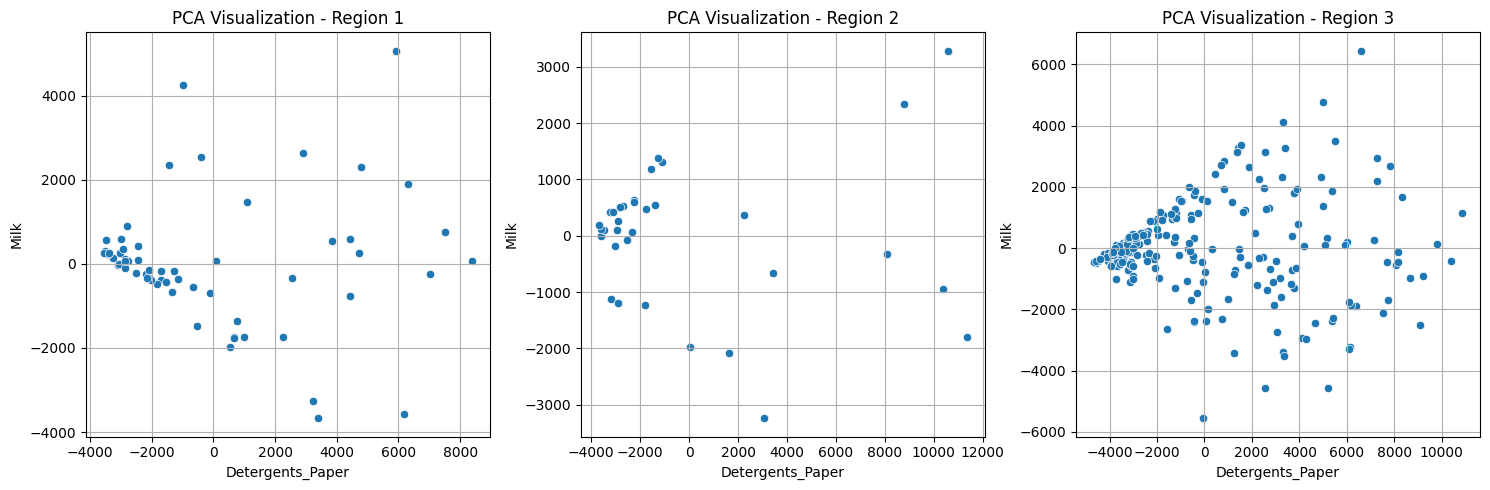

<Figure size 640x480 with 0 Axes>

In [52]:
# Subset the data for each region
region1_data = df[df['Region'] == 1][['Detergents_Paper','Milk']]
region2_data = df[df['Region'] == 2][['Detergents_Paper','Milk']]
region3_data = df[df['Region'] == 3][['Detergents_Paper','Milk']]

features = ['Detergents_Paper', 'Milk']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over regions
for i, region_data in enumerate([region1_data, region2_data, region3_data]):
    # Applying PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(region_data[features])

    # Visualize PCA for each region
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], ax=axs[i])
    axs[i].set_title(f'PCA Visualization - Region {i+1}')
    axs[i].set_xlabel('Detergents_Paper')
    axs[i].set_ylabel('Milk')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

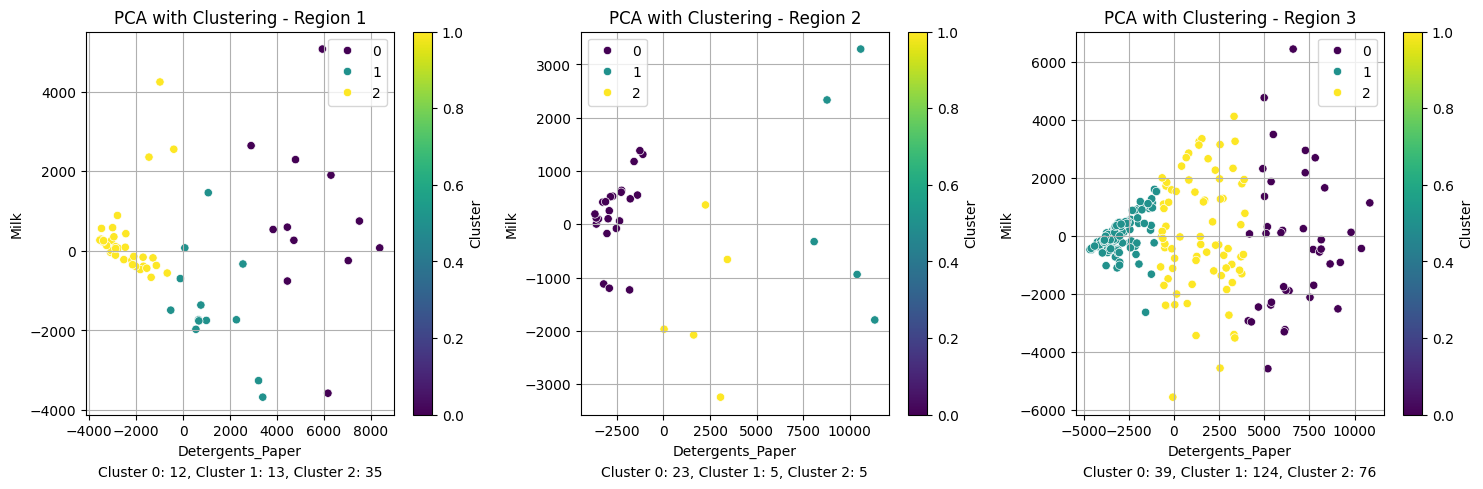

In [53]:
# Create subplots for each region's PCA visualization
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed
for i, region_data in enumerate([region1_data, region2_data, region3_data]):
    # Applying PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(region_data[features])

    # Perform clustering on PCA components
    kmeans = KMeans(n_clusters=3, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_result)

    # Visualize PCA with clustering for each region
    scatter = sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels, palette='viridis', ax=axs[i])
    axs[i].set_title(f'PCA with Clustering - Region {i+1}')
    axs[i].set_xlabel('Detergents_Paper')
    axs[i].set_ylabel('Milk')
    axs[i].grid(True)

    cbar = plt.colorbar(scatter.get_children()[0], ax=axs[i]) 
    cbar.set_label('Cluster')

    unique_clusters = sorted(set(cluster_labels))
    cluster_counts = [list(cluster_labels).count(c) for c in unique_clusters]
    subtitle_text = ', '.join([f'Cluster {c}: {count}' for c, count in zip(unique_clusters, cluster_counts)])
    axs[i].text(0.5, -0.15, subtitle_text, ha='center', va='center', transform=axs[i].transAxes, fontsize=10)

plt.tight_layout()
plt.show()